# Homework 5 - Exploring StackOverflow!

## 1. Data

In [59]:
# First, import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

The first step, as always, is to download the data you will be working on. We downloaded the 3 files which contains : 

['Answers to questions', 'Comments to questions', 'Comments to answers']

In [60]:
df1 =  pd.read_csv('sx-stackoverflow-a2q.txt', header=None, delim_whitespace=True)
df2 = pd.read_csv('sx-stackoverflow-c2q.txt', header=None, delim_whitespace=True)
df3 = pd.read_csv('sx-stackoverflow-c2a.txt', header=None, delim_whitespace=True)

In [61]:
df1.shape , df2.shape ,df3.shape

((17823525, 3), (20268151, 3), (25405374, 3))

Due to the data is a lot, we focus on a smaller interval time and test all implementations on it. We decided to choose start date = "2013-01-01" and end date = "2013-02-01".

In [62]:
print(pd.Timestamp('2013-01-01').timestamp() , pd.Timestamp('2013-02-01').timestamp())

1356998400.0 1359676800.0


In [102]:
df1_filtered= df1[(df1[2] > 1356998400) & (df1[2] < 1359676800)] # After filtering data df1 has 262448 rows
df2_filtered= df2[(df2[2] > 1356998400) & (df2[2] < 1359676800)] # After filtering data df2 has 312139 rows
df3_filtered= df3[(df3[2] > 1356998400) & (df3[2] < 1359676800)] # After filtering data df3 has 403651 rows

In [103]:
def expand_column(df, type1=None, type2=None):
    df = df.astype(str)
    df.columns = ['u1', 'u2', 't']
    df.loc[:, 'u1'] = type1 + df.loc[:, 'u1']
    df.loc[:, 'u2'] = type2 + df.loc[:, 'u2']
    return df

In [137]:
def draw_graph(G, edges_label):
    cmap = []
    for node in G:
        if node.startswith('u'):
            cmap.append('purple')
        elif node.startswith('q'):
            cmap.append('yellow')
        elif node.startswith('a'):
            cmap.append('green')
    # cmap = ['purple' if node.startswith('u') we 'yellow' for node in G]
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, node_color=cmap)
    edge_labels = dict([((n1, n2), edges_label)
                        for n1, n2, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

In [105]:
def get_edge_labels(dfs):
    edge_labels = {}
    for df in dfs:
        for n1, n2, _ in df.values:
            edge_labels[(n1, n2)] = 'a'
    return edge_labels

In [106]:
final_df1 = expand_column(df1_filtered, type1='u', type2='q')
final_df2 = expand_column(df2_filtered, type1='u', type2='q')
final_df3 = expand_column(df3_filtered, type1='u', type2='a')

In [118]:
df = pd.concat([final_df1,final_df2,final_df3],ignore_index=True)
df.shape

(978238, 3)

We filtered 3 files by a specific time period and then saved them into a single csv file. We will test the implementations on this data frame.

In [125]:
df.to_csv('C:/Users/Aybüke Hamide AK/Desktop/ADM HW 5/new_df.csv',index=False)

#### Drawing Weighted Graph

In the combined graph we have a weighted link between these two users as timestamps. 

In [107]:
df1_ex = final_df1.iloc[:2]
df2_ex = final_df2.iloc[:2]
df3_ex = final_df3.iloc[:2]

In [142]:
ex_frames = [df1_ex, df2_ex, df3_ex]
edge_labels = get_edge_labels(ex_frames)
print(edge_labels)
print(df1)

{('u941240', 'q584508'): 'a', ('u16007', 'q1176091'): 'a', ('u1570534', 'q1133188'): 'a', ('u861716', 'q904946'): 'a', ('u411918', 'a411918'): 'a', ('u65070', 'a65070'): 'a'}
                0        1           2
0               9        8  1217567877
1               1        1  1217573801
2              13        1  1217606247
3              17        1  1217617639
4              48        2  1217618182
...           ...      ...         ...
17823520  2773607  1048138  1457266581
17823521  6018278  1982354  1457266589
17823522  3187183  1404306  1457266650
17823523  6022341  1667278  1457266660
17823524  6018304  6024256  1457266693

[17823525 rows x 3 columns]


In [127]:
graph_df = pd.concat(ex_frames)

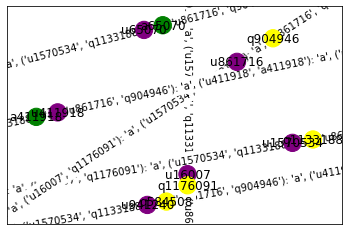

In [146]:
G = nx.from_pandas_edgelist(graph_df, 'u1', 'u2', ['t'], create_using=nx.DiGraph())
draw_graph(G, edge_labels)

In [17]:
# df1['t'] = [datetime.utcfromtimestamp(t).strftime("%Y-%m-%d %H:%M:%S") for t in df1['t']] 